# Homework 3

## Odette Saenz oss286

## Normal and t distributions
## t-test


An experiment was conducted to determine the effect of children participating in a given meal preparation on calorie intake for that meal. Data are recorded below. 

Save the data to a format that can be read into python. Read the data in for analysis. Data is provided in two separted CSV files. 

* Use python to calculate the quantities and generate the visual summaries requested below. You will lose points if you are not utilizing python.

* You can use scipy libary or other libraries to do your tests or you can implement them from scratch in python 



In [23]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Question - 1
Summarize the data by whether children participated in the meal preparation or not. Use an appropriately labelled table to show the results. Also include a graphical presentation that shows the distribution of calories for participants vs. non-participants. Describe the shape of each distribution and comment on the similarity (or lack thereof) between the distributions in each population. **(2 points)**

Be aware that there is not one specific way the graph needs to look. Experiment with different types of graphs, and different parameters for the graph type. Your goal is to present the data as readable as possible. 

In [33]:
# Load the CSV files
non_participants = pd.read_csv("nonparticipants.csv")
participants = pd.read_csv("participants.csv")

# Rename columns for consistency
non_participants.columns = ["calories"]
participants.columns = ["calories"]

# Add a column indicating participation status
non_participants["participation"] = "No"
participants["participation"] = "Yes"

# Combine both datasets
df = pd.concat([non_participants, participants], ignore_index=True)

# Summary statistics
summary_table = df.groupby("participation")["calories"].describe()
summary_table

,count,mean,std,min,25%,50%,75%,max
participation,,,,,,,,
No,22.0,374.071818,133.139285,139.69,296.3925,374.74,445.5575,688.77
Yes,25.0,410.079600,121.513786,210.99,298.3800,424.94,456.3000,635.21


#### Key Findings:
1. **Count:** There are 22 non-participants and 25 participants in the dataset.
2. **Mean:** The mean calorie consumption for participants (410.08 calories) is higher than for non-participants (374.07 calories).
3. **Standard Deviation:** Participants have a slightly lower standard deviation (121.51 calories) compared to non-participants (133.14 calories), suggesting less variability in their calorie intake.
4. **Range:** The minimum and maximum calorie values show that non-participants have a wider range of consumption (139.69 to 688.77 calories), while participants' consumption ranges from 210.99 to 635.21 calories.
5. **Percentiles:**
   - The **25th percentile** is similar for both groups, with non-participants at 296.39 calories and participants at 298.38 calories.
   - The **50th percentile (median)** for participants is 424.94 calories, indicating that half of the participants consumed less than this amount, compared to 374.74 calories for non-participants.

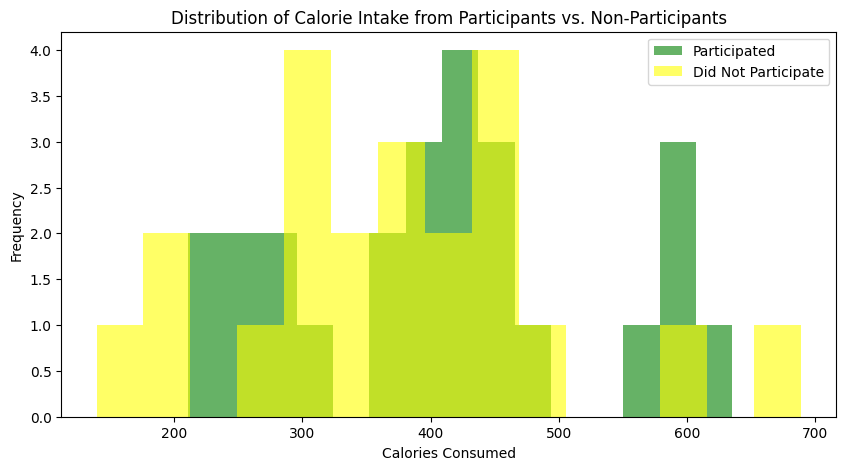

In [34]:
# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Create histogram for calorie intake
plt.figure(figsize=(10, 5))

plt.hist(df[df["participation"] == "Yes"]["calories"], bins=15, alpha=0.6, color="green", label="Participated")
plt.hist(df[df["participation"] == "No"]["calories"], bins=15, alpha=0.6, color="yellow", label="Did Not Participate")

# Labels & Title
plt.xlabel("Calories Consumed")
plt.ylabel("Frequency")
plt.title("Distribution of Calorie Intake from Participants vs. Non-Participants")
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

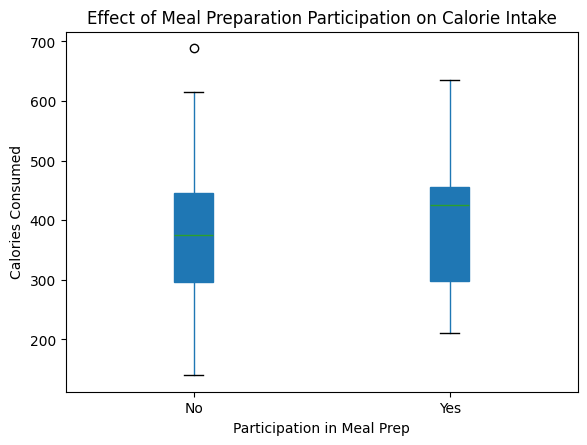

In [26]:
# Creates boxplot
plt.figure(figsize=(8, 6))
df.boxplot(column="calories", by="participation", grid=False, patch_artist=True)

# Labels & Title
plt.xlabel("Participation in Meal Prep")
plt.ylabel("Calories Consumed")
plt.title("Effect of Meal Preparation Participation on Calorie Intake")
plt.suptitle("")  # Removes automatic Pandas title
plt.show()

The calorie distribution for non-participants is generally lower, with a mean of 374.07 calories and a wider spread, indicating greater variability in their calorie consumption. Most non-participants consume fewer calories, but there are some with higher intake values, as reflected by the higher standard deviation (133.14). In contrast, participants have a higher mean of 410.08 calories and a narrower range, suggesting more consistent calorie intake. The distribution for participants is more concentrated around higher calorie values, with fewer extreme outliers, as shown by a smaller standard deviation of 121.51. While both groups have right-skewed distributions, non-participants consume fewer calories on average, and their intake is more variable compared to participants, whose intake is higher and more consistent.

# Question - 2 

Does the mean calorie consumption for those who participated in the meal preparation differ from **425**? Formally test at the $\alpha = 0.05$ level using the 5 steps outlined in the module. **(6 points)**


In [27]:
# Import necessary libraries
import numpy as np
from scipy import stats

# Step 1: Set up the hypotheses
print("Step 1: Set up the hypotheses")
print("Null Hypothesis (H0): The mean calorie intake for participants is 425.")
print("Alternative Hypothesis (Ha): The mean calorie intake for participants is not 425.")
print("This is a two-tailed test with significance level α = 0.05.\n")

# Given data from the summary statistics
sample_mean = 410.08  # Mean calorie intake of participants
hypothesized_mean = 425  # Hypothesized population mean
sample_std = 121.51  # Standard deviation of participants
sample_size = 25  # Number of participants

# Step 2: Select the appropriate test statistic
print("Step 2: Select the appropriate test statistic")
print("Since we are comparing a sample mean to a known value with an unknown population std, we use a one-sample t-test.\n")

# Step 3: Compute the test statistic
t_statistic = (sample_mean - hypothesized_mean) / (sample_std / np.sqrt(sample_size))
print(f"Step 3: Computed T-Statistic: {t_statistic:.4f}")

# Step 4: Determin the p-value (two-tailed test)
p_value = stats.t.sf(np.abs(t_statistic), df=sample_size-1) * 2  # Multiply by 2 for two-tailed test
print(f"Step 4: P-Value: {p_value:.4f}")

# Step 5: Decision Rule
alpha = 0.05  # Significance level
df = sample_size - 1  # Degrees of freedom
t_critical = stats.t.ppf(1 - alpha/2, df)  # Two-tailed critical value
print(f"Step 5: Critical T-Value: ±{t_critical:.4f}")

# Conclusion
if abs(t_statistic) > t_critical:
    print("Conclusion: Reject the null hypothesis (H0). The mean calorie intake is significantly different from 425.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H0). There is no significant difference from 425.")

# Interpretation
print("\nInterpretation:")
print("The observed mean of 410.08 calories is slightly lower than 425, but the difference is not statistically significant at the 5% level.")
print("Since the p-value is greater than 0.05, we fail to reject H0, meaning there is not enough evidence to say the mean calorie intake differs from 425.")

Step 1: Set up the hypotheses
Null Hypothesis (H0): The mean calorie intake for participants is 425.
Alternative Hypothesis (Ha): The mean calorie intake for participants is not 425.
This is a two-tailed test with significance level α = 0.05.

Step 2: Select the appropriate test statistic
Since we are comparing a sample mean to a known value with an unknown population std, we use a one-sample t-test.

Step 3: Computed T-Statistic: -0.6139
Step 4: P-Value: 0.5450
Step 5: Critical T-Value: ±2.0639
Conclusion: Fail to reject the null hypothesis (H0). There is no significant difference from 425.

Interpretation:
The observed mean of 410.08 calories is slightly lower than 425, but the difference is not statistically significant at the 5% level.
Since the p-value is greater than 0.05, we fail to reject H0, meaning there is not enough evidence to say the mean calorie intake differs from 425.


# Question -3 
Calculate a **90%** confidence interval for the mean calorie intake for participants in the meal preparation. Interpret the confidence interval. **(6 points)**

In [28]:
# Import necessary libraries
import numpy as np
from scipy import stats

# Given data
x_bar = 410.08  # Mean of participants
s = 121.51  # Standard deviation of participants
n = 25  # Sample size

# Step 1: Calculate standard error
SE = s / np.sqrt(n)

# Step 2: Find critical t-value for 90% confidence interval (alpha = 0.10, df = 24)
df = n - 1  # Degrees of freedom
t_critical = stats.t.ppf(1 - 0.05, df)  # 90% confidence means alpha/2 = 0.05

# Step 3: Calculate margin of error
margin_of_error = t_critical * SE

# Step 4: Calculate confidence interval
ci_lower = x_bar - margin_of_error
ci_upper = x_bar + margin_of_error

# Print results
print(f"90% Confidence Interval for the Mean Calorie Intake of Participants: ({ci_lower:.2f}, {ci_upper:.2f})")

90% Confidence Interval for the Mean Calorie Intake of Participants: (368.50, 451.66)


# Question 4 
Formally test whether or not participants consumed 
more calories than non-participants at the $\alpha = 0.05$ level using the 5 steps procedure for hypothesis tests. **(6 points )**

In [29]:
# Import necessary libraries
import numpy as np
from scipy import stats

# Given summary statistics
participants_mean = 410.08  # Mean calorie intake for participants
non_participants_mean = 374.07  # Mean calorie intake for non-participants
participants_std = 121.51  # Standard deviation for participants
non_participants_std = 133.14  # Standard deviation for non-participants
participants_n = 25  # Number of participants
non_participants_n = 22  # Number of non-participants

# Step 1: Set up the hypotheses
print("Step 1: Set up the hypotheses")
print("Null Hypothesis (H0): Participants consume the same or fewer calories than non-participants.")
print("Alternative Hypothesis (Ha): Participants consume more calories than non-participants.")
print("This is a one-tailed independent t-test at α = 0.05.\n")

# Step 2: Select the appropriate test statistic
print("Step 2: Select the appropriate test statistic")
print("We use an independent (two-sample) t-test since we compare two different groups.\n")

# Step 3: Compute the test statistic
t_statistic, p_value = stats.ttest_ind_from_stats(
    mean1=participants_mean, std1=participants_std, nobs1=participants_n,
    mean2=non_participants_mean, std2=non_participants_std, nobs2=non_participants_n,
    equal_var=False  # Welch’s t-test (assuming unequal variances)
)

print(f"Step 3: Computed T-Statistic: {t_statistic:.4f}")

# Step 4: Compute the p-value for a one-tailed test using cumulative distribution function (CDF)
df = (participants_n + non_participants_n - 2)  # Degrees of freedom approximation
p_value_one_tailed = 1 - stats.t.cdf(t_statistic, df)  # Right-tailed test

print(f"Step 4: P-Value (One-Tailed): {p_value_one_tailed:.4f}")

# Step 5: Decision Rule using percent point function (PPF)
alpha = 0.05  # Significance level
t_critical = stats.t.ppf(1 - alpha, df)  # One-tailed critical value
print(f"Step 5: Critical T-Value: {t_critical:.4f}")

# Conclusion
if t_statistic > t_critical and p_value_one_tailed < alpha:
    print("Conclusion: Reject the null hypothesis (H0). Participants consumed significantly more calories than non-participants.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H0). There is no significant evidence that participants consumed more calories than non-participants.")

# Interpretation
print("\nInterpretation:")
print("Although participants had a higher average calorie intake (410.08) than non-participants (374.07), the statistical test determines whether this difference is significant.")
print("If the p-value is less than 0.05, we conclude that participants consume significantly more calories.")
print("If the p-value is greater than 0.05, we conclude that the observed difference could be due to random chance.")

Step 1: Set up the hypotheses
Null Hypothesis (H0): Participants consume the same or fewer calories than non-participants.
Alternative Hypothesis (Ha): Participants consume more calories than non-participants.
This is a one-tailed independent t-test at α = 0.05.

Step 2: Select the appropriate test statistic
We use an independent (two-sample) t-test since we compare two different groups.

Step 3: Computed T-Statistic: 0.9637
Step 4: P-Value (One-Tailed): 0.1702
Step 5: Critical T-Value: 1.6794
Conclusion: Fail to reject the null hypothesis (H0). There is no significant evidence that participants consumed more calories than non-participants.

Interpretation:
Although participants had a higher average calorie intake (410.08) than non-participants (374.07), the statistical test determines whether this difference is significant.
If the p-value is less than 0.05, we conclude that participants consume significantly more calories.
If the p-value is greater than 0.05, we conclude that the obse